In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('C:\\Users\\arif\\OneDrive\\Journal Paper\\Code\\Irshad\\Dataset\\2_Missing_Values_Identified.csv', parse_dates=['date_and_hour'], index_col='date_and_hour')

<AxesSubplot:>

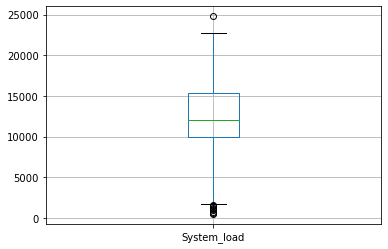

In [23]:
df.boxplot('System_load')

In [24]:
def detect_outliers_iqr(data):
    outliers = []
    #data = sorted(data)
    q1 = data['System_load'].quantile(0.25)
    q3 = data['System_load'].quantile(0.75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    idx = 2
    idx_list = []
    for i in list(data['System_load']): 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            idx_list.append(idx)
        idx = idx + 1
    data.loc[data['System_load'] < lwr_bound, 'System_load'] = np.nan
    data.loc[data['System_load'] > upr_bound, 'System_load'] = np.nan
    return outliers, data, idx_list# Driver code

In [25]:
sample_outliers, p_data, index_of_out = detect_outliers_iqr(df)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [1256.0, 1414.0, 1548.0, 637.0, 473.0, 754.0, 943.0, 1457.0, 1098.0, 24786.0]


In [26]:
pd.isnull(p_data['System_load']).sum()

183

In [27]:
index_of_out

[175, 176, 177, 577, 578, 579, 580, 581, 582, 13826]

In [29]:
p_data.reset_index(inplace=True)

In [30]:
p_data.to_csv('C:\\Users\\arif\\OneDrive\\Journal Paper\\Code\\Irshad\\Dataset\\3_Outlier_Identified.csv',index=False)